In [1]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Haard Shah\Downloads


In [2]:
! pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.4 torch-2.2.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Setup complete  (12 CPUs, 15.9 GB RAM, 437.1/475.7 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
! mkdir {HOME}/datasets
%cd {HOME}/datasets

! pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3OEqKlaUTLNgrFZGJiv6")
project = rf.workspace("kashish").project("3riders")
version = project.version(2)
dataset = version.download("yolov8")



[WinError 2] The system cannot find the file specified: 'c:\\Users\\Haard Shah\\Downloads/datasets'
c:\Users\Haard Shah\Downloads


The syntax of the command is incorrect.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...


In [7]:
%cd {HOME}

! yolo task=detect mode=train model=yolov8s.pt data="c:/Users/Haard Shah/Downloads/data.yaml" epochs=100 imgsz=800 plots=True

c:\Users\Haard Shah\Downloads



  0%|          | 0.00/21.5M [00:00<?, ?B/s]
  0%|          | 40.0k/21.5M [00:00<01:09, 324kB/s]
  1%|          | 264k/21.5M [00:00<00:16, 1.33MB/s]
  4%|▎         | 824k/21.5M [00:00<00:06, 3.17MB/s]
  7%|▋         | 1.49M/21.5M [00:00<00:04, 4.60MB/s]
 10%|█         | 2.21M/21.5M [00:00<00:03, 5.60MB/s]
 14%|█▎        | 2.91M/21.5M [00:00<00:03, 6.14MB/s]
 17%|█▋        | 3.65M/21.5M [00:00<00:02, 6.59MB/s]
 20%|██        | 4.37M/21.5M [00:00<00:02, 6.81MB/s]
 24%|██▍       | 5.24M/21.5M [00:00<00:02, 7.31MB/s]
 29%|██▊       | 6.15M/21.5M [00:01<00:02, 7.51MB/s]
 32%|███▏      | 6.87M/21.5M [00:01<00:02, 6.70MB/s]
 36%|███▌      | 7.77M/21.5M [00:01<00:01, 7.42MB/s]
 40%|███▉      | 8.57M/21.5M [00:01<00:01, 7.58MB/s]
 44%|████▎     | 9.40M/21.5M [00:01<00:01, 7.85MB/s]
 48%|████▊     | 10.3M/21.5M [00:01<00:01, 8.23MB/s]
 52%|█████▏    | 11.1M/21.5M [00:01<00:01, 8.36MB/s]
 57%|█████▋    | 12.2M/21.5M [00:01<00:01, 9.08MB/s]
 61%|██████    | 13.1M/21.5M [00:01<00:00, 9.15MB/s]
 65%

/content


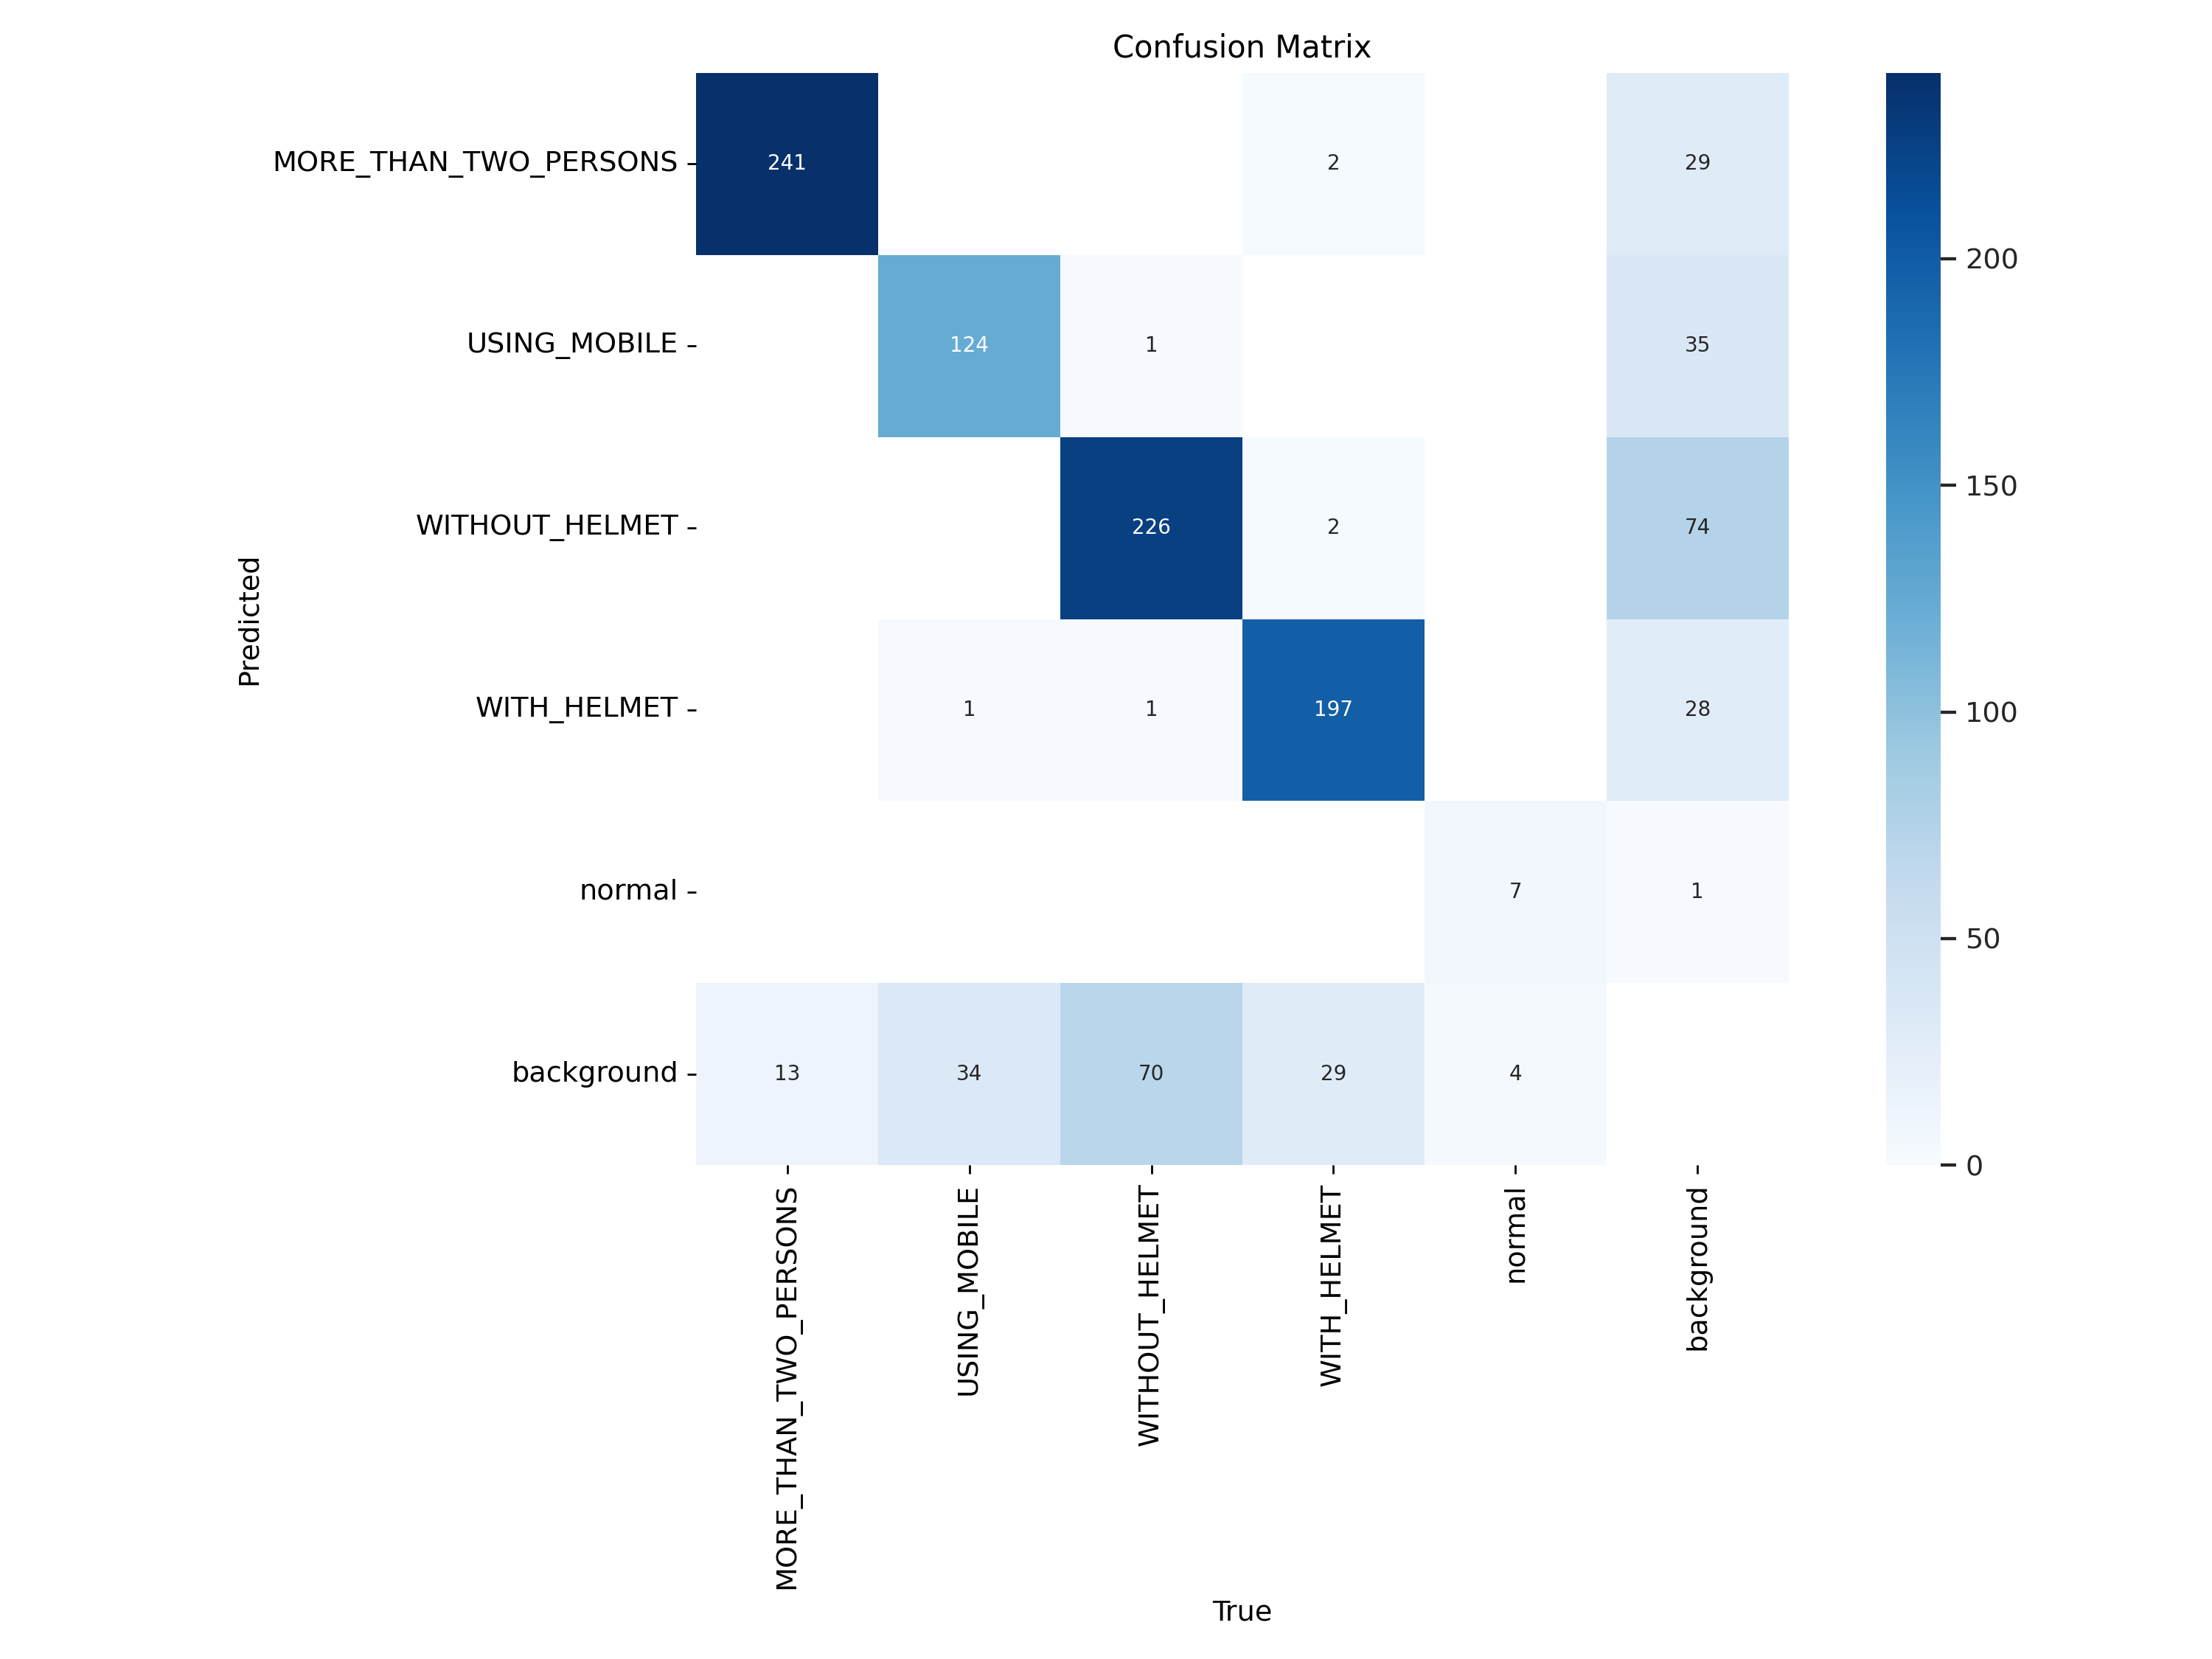

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


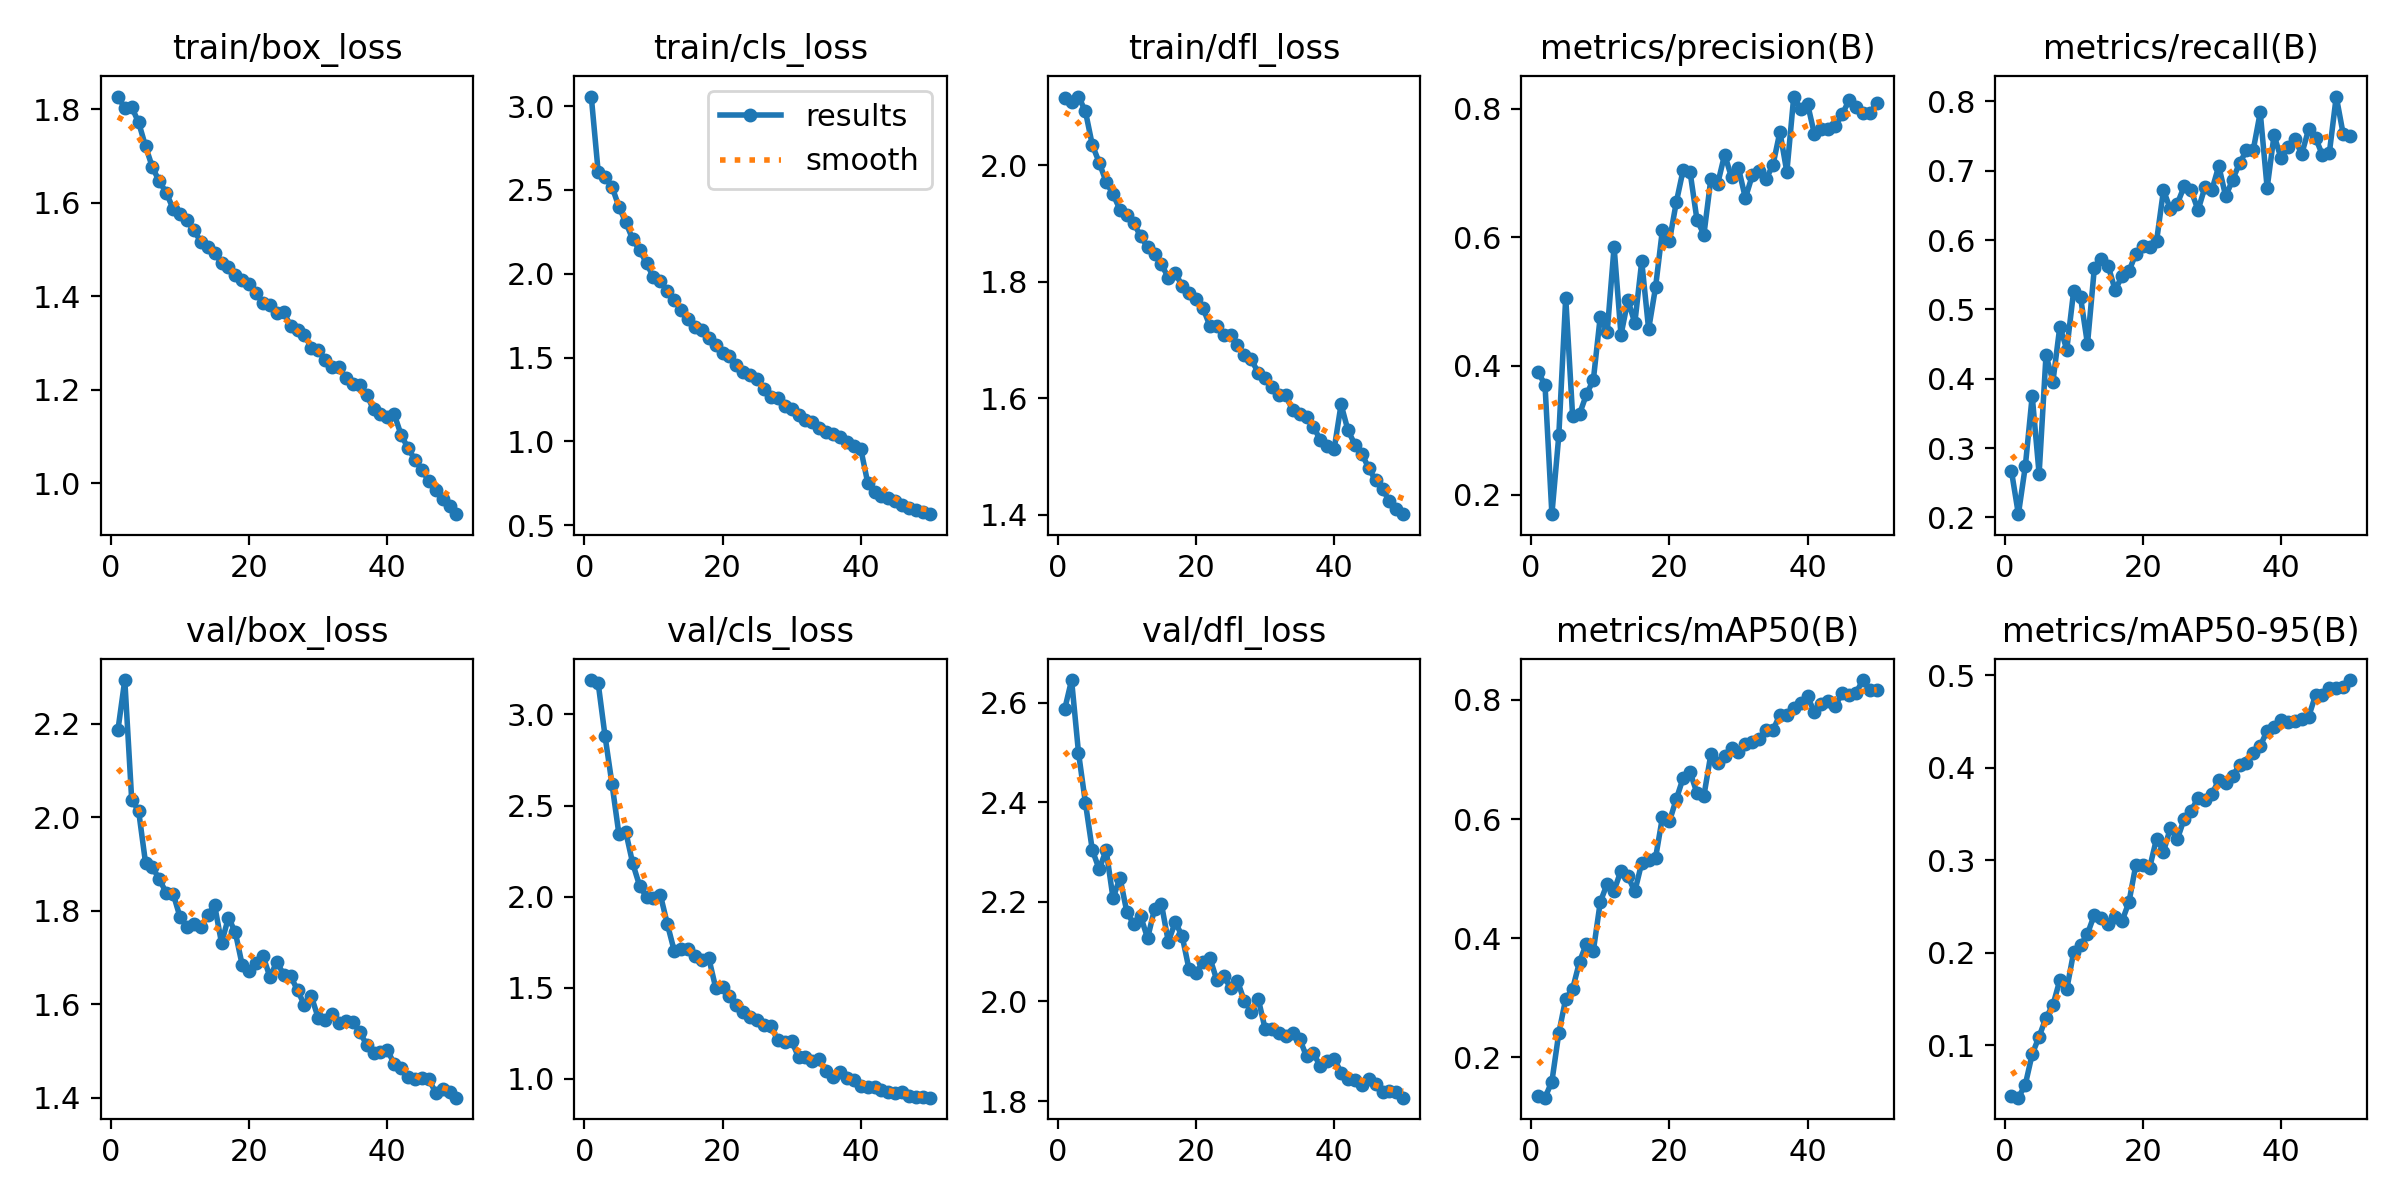

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


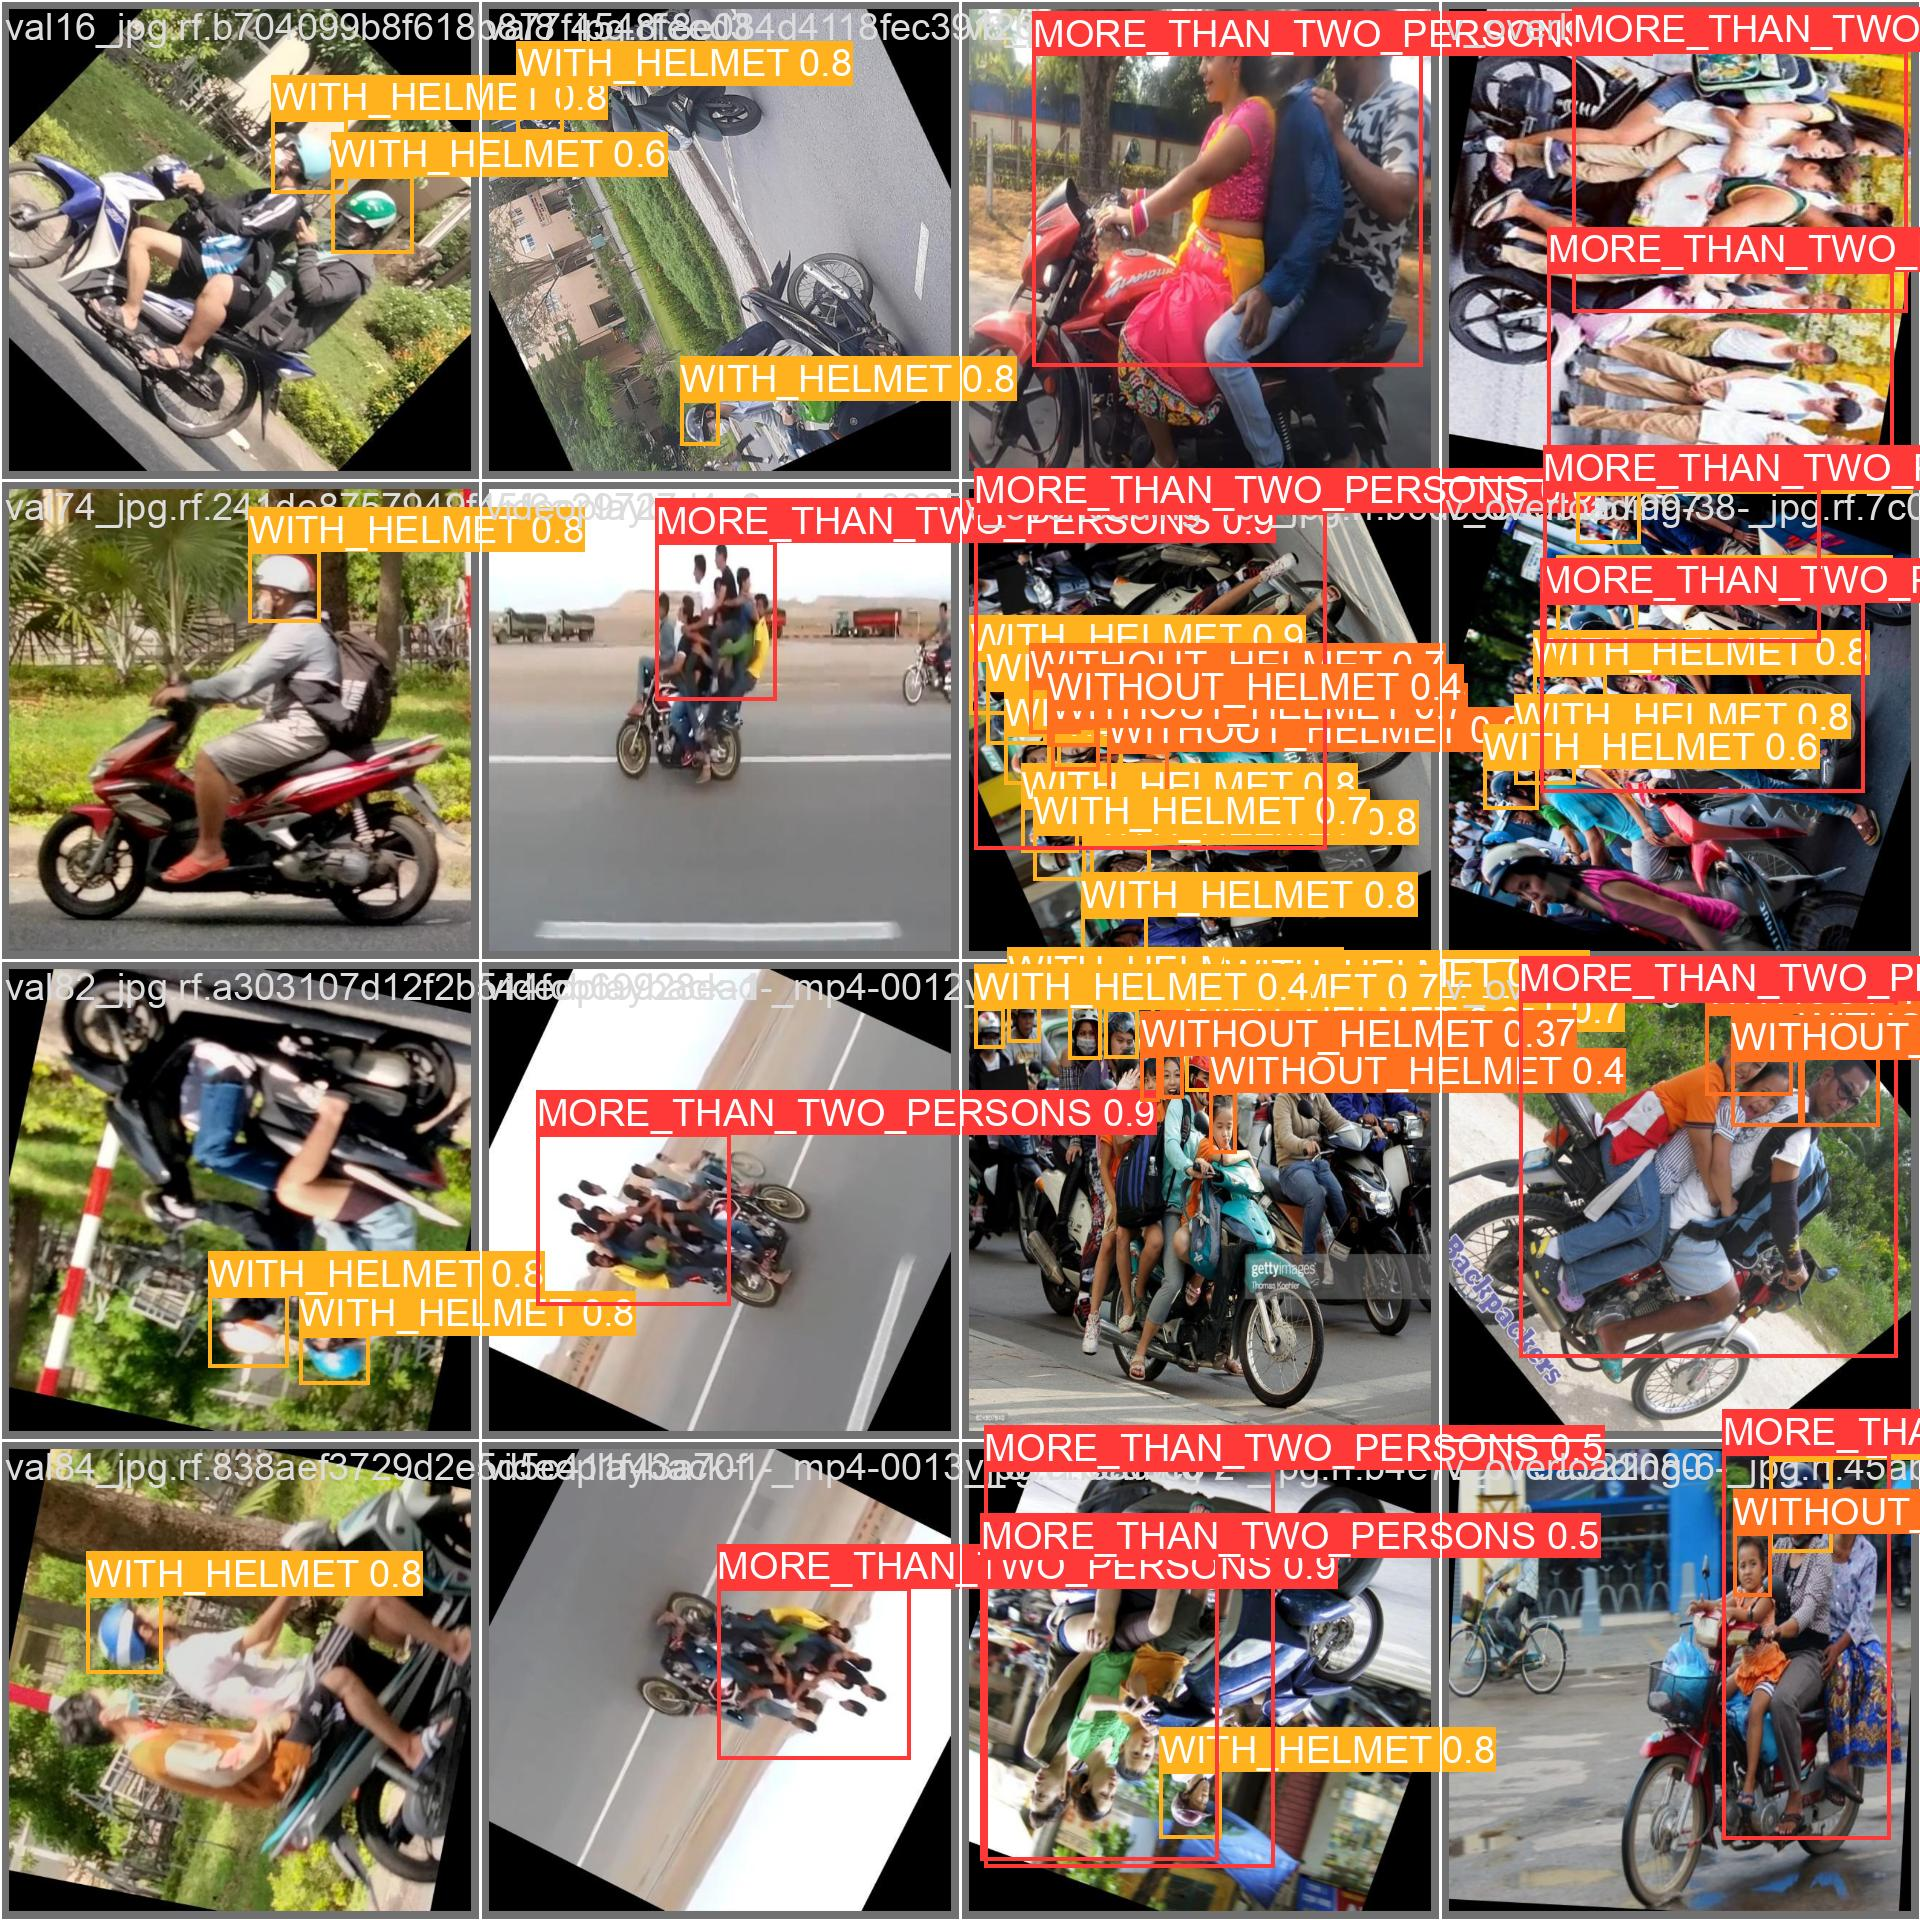

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/3riders-2/valid/labels.cache... 514 images, 3 backgrounds, 0 corrupt: 100% 514/514 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:14<00:00,  2.29it/s]
                   all        514        952      0.808       0.75      0.819      0.496
 MORE_THAN_TWO_PERSONS        514        254      0.894      0.925      0.954      0.633
          USING_MOBILE        514        159       0.76      0.742      0.828      0.471
        WITHOUT_HELMET        514        298      0.751      0.697       0

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/248 /content/3riders-2/test/images/0_d811f3f2_3788_4245_9106_97507dc8feb6_jpeg_jpg.rf.28b21aed91f90b8eaf05737c020cfcb2.jpg: 800x800 1 WITH_HELMET, 22.5ms
image 2/248 /content/3riders-2/test/images/102_8263a6df_4cd7_44ef_88b0_366f7038bdbd_jpeg_jpg.rf.86d81373c9810683009f3468bece01b1.jpg: 800x800 1 WITH_HELMET, 22.5ms
image 3/248 /content/3riders-2/test/images/103_jpg.rf.dc8c3136171486549559182dbf9eb68d.jpg: 800x800 1 MORE_THAN_TWO_PERSONS, 2 WITHOUT_HELMETs, 22.4ms
image 4/248 /content/3riders-2/test/images/103_mp4-0008_jpg.rf.7fe2c6106ac17eb2ab6c44feb72f96b7.jpg: 800x800 1 MORE_THAN_TWO_PERSONS, 1 WITH_HELMET, 22.4ms
image 5/248 /content/3riders-2/test/images/104_jpg.rf.8fab52c97df17cc11c5376a8fbf4206f.jpg: 800x800 1 MORE_THAN_TWO_PERSONS, 22.4ms
image 6/248 /c

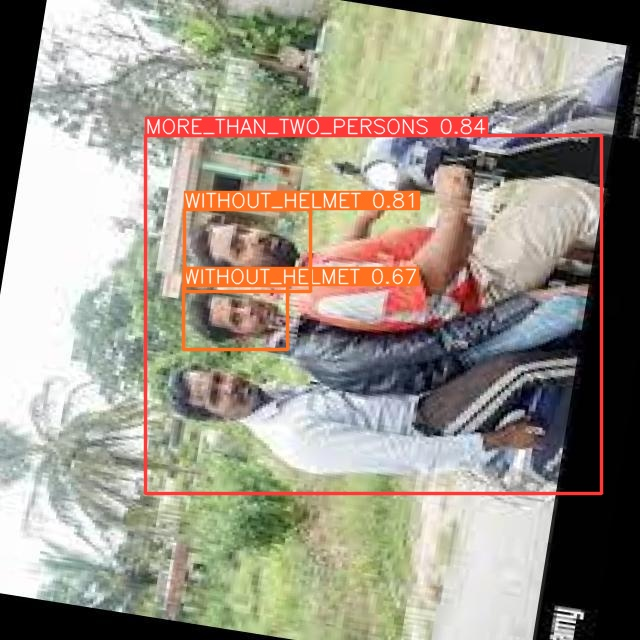

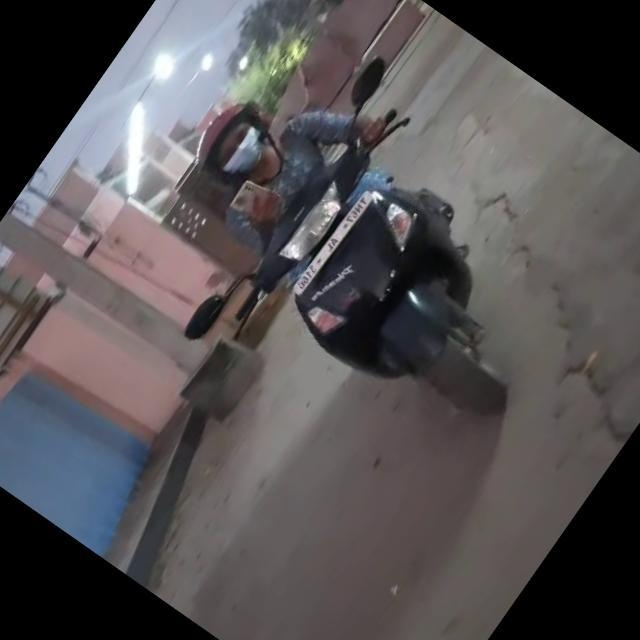

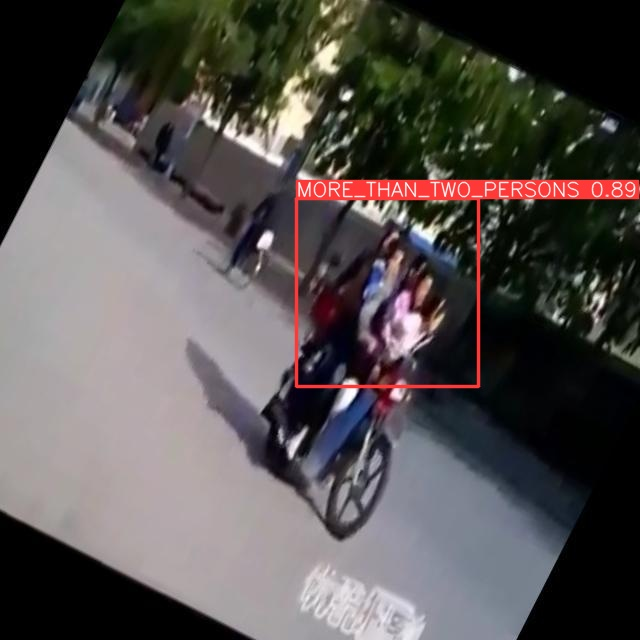

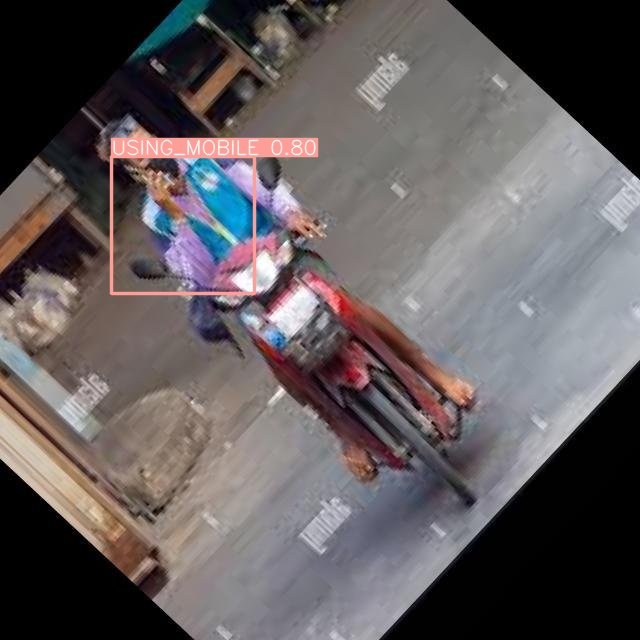

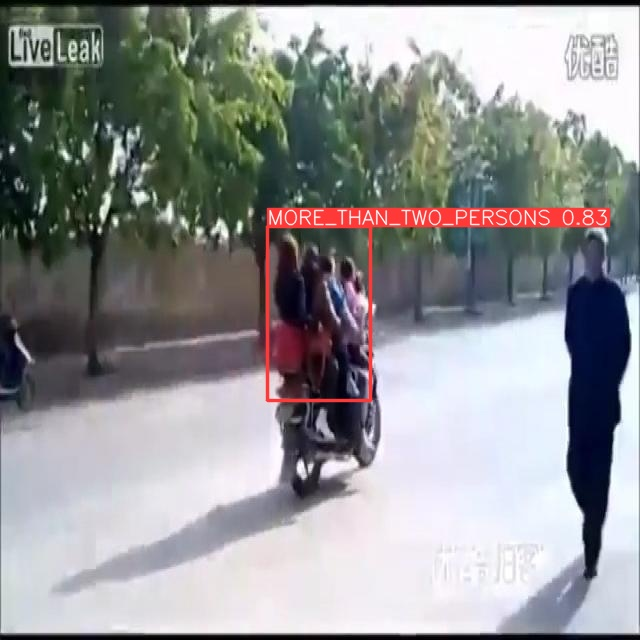

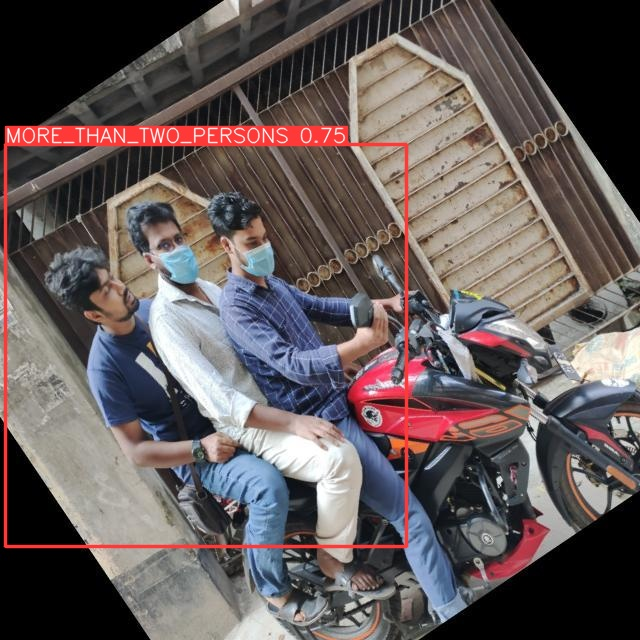

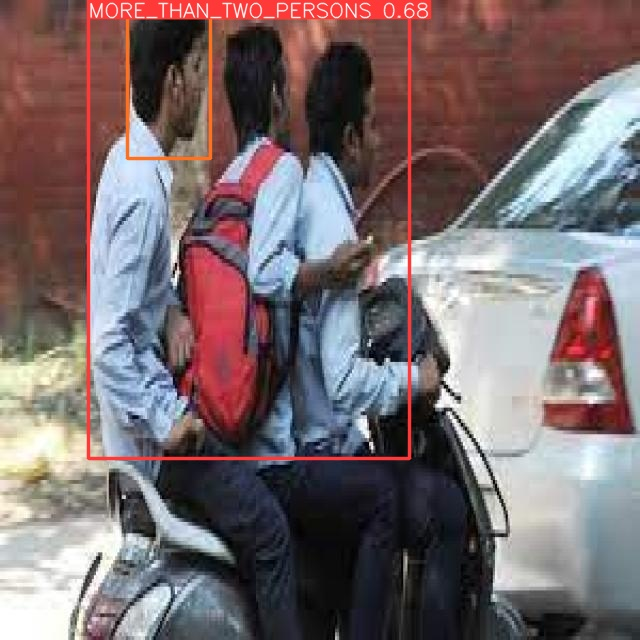

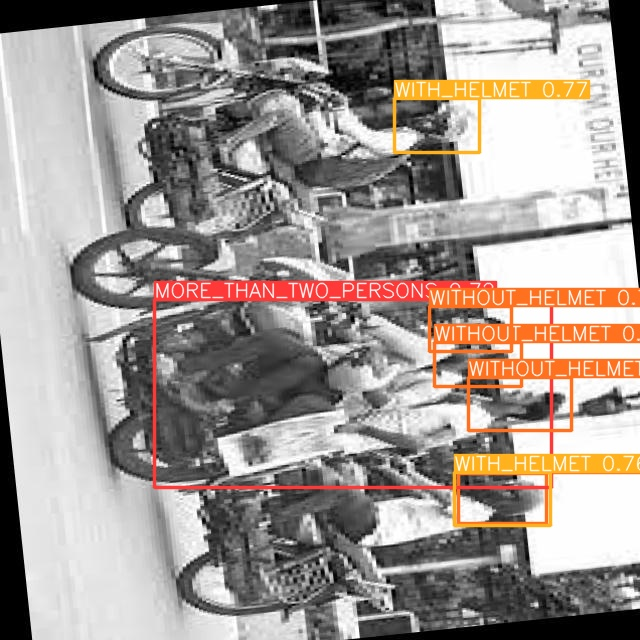

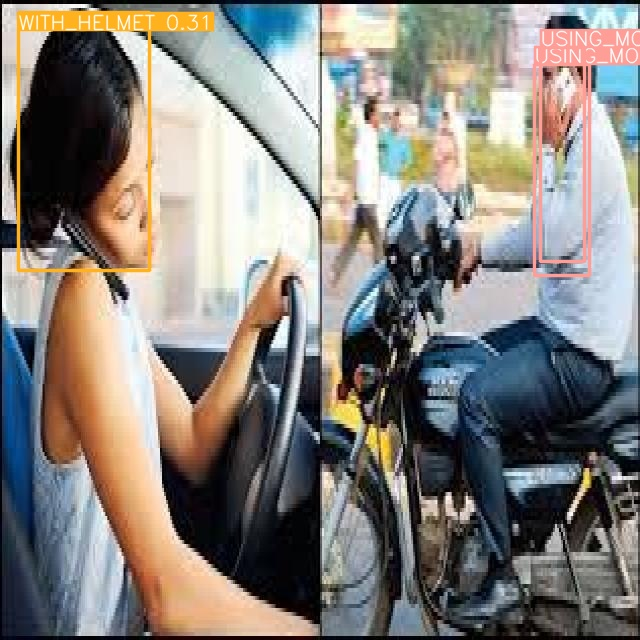

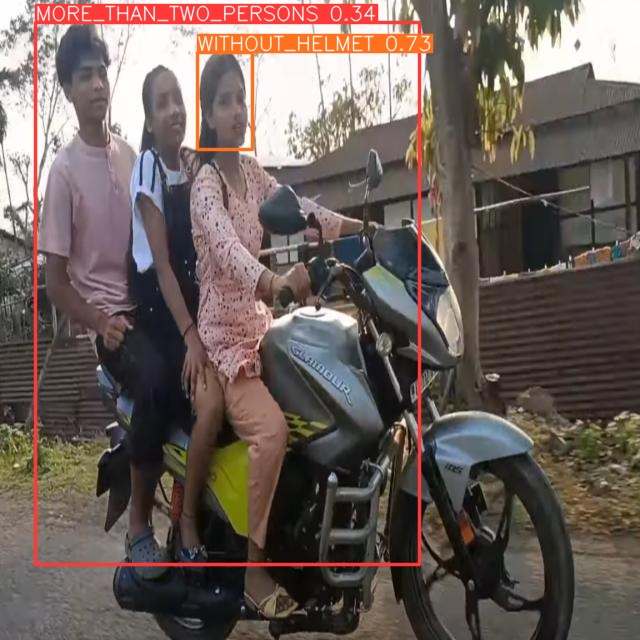

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
+